# EDA

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Data/raw_data.csv')
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
df.drop('Timestamp', axis=1, inplace=True)

In [5]:
df.shape

(2023070, 3)

In [6]:
# Find number of missing values in each column
df.isna().sum()

UserId       0
ProductId    0
Rating       0
dtype: int64

In [7]:
df['Rating'] = df['Rating'].astype('int8')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   UserId     object
 1   ProductId  object
 2   Rating     int8  
dtypes: int8(1), object(2)
memory usage: 32.8+ MB


In [9]:
# Number of unique user id, product id and rating in the data
df.nunique()

UserId       1210271
ProductId     249274
Rating             5
dtype: int64

In [10]:
# Summary statistics of 'rating' variable
df.describe()

,Rating
count,2.023070e+06
mean,4.149036e+00
std,1.311505e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


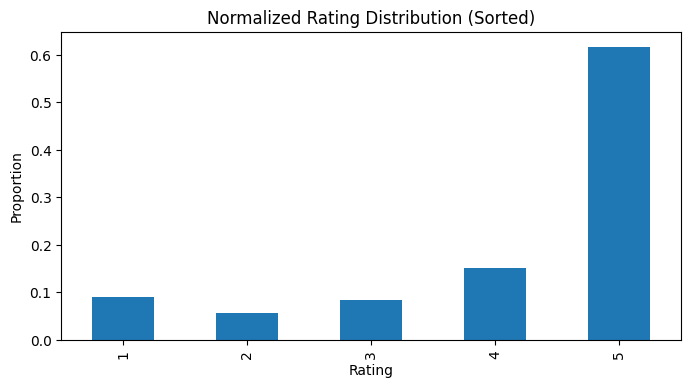

In [11]:
#Create the plot and provide observations

plt.figure(figsize=(8, 4))
df['Rating'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Normalized Rating Distribution (Sorted)')
plt.show()

The distribution is skewed to the right. Over 50% of the ratings are 5, followed by a little below 20% with 4 star ratings. And the percentages of ratings keep going down until below 10% of the ratings are 2 stars.

In [12]:
# Top, bottom 10 users based on rating
most_rated = df.groupby('UserId')['Rating'].count().sort_values(ascending=False)[:10]
least_rated = df.groupby('UserId')['Rating'].count().sort_values(ascending=False)[-10:]
most_rated, least_rated

(UserId
 A3KEZLJ59C1JVH    389
 A281NPSIMI1C2R    336
 A3M174IC0VXOS2    326
 A2V5R832QCSOMX    278
 A3LJLRIZL38GG3    276
 ALQGOMOY1F5X9     275
 AKMEY1BSHSDG7     269
 A3R9H6OKZHHRJD    259
 A1M04H40ZVGWVG    249
 A1RRMZKOMZ2M7J    225
 Name: Rating, dtype: int64,
 UserId
 AZZW1OIA8GA92            1
 A00275441WYR3489IKNAB    1
 A001917029LKCOSCCWHP6    1
 AZZRS2XK17RFQ            1
 AZZVV7G4PUYXA            1
 A00260721BZWSYAKGDLGW    1
 AZZZU2TD7Q3ET            1
 A00008821J0F472NDY6A2    1
 A000186437REL8X2RW8UW    1
 A0002574WYJMBWKNCPY8     1
 Name: Rating, dtype: int64)

<Axes: ylabel='Count'>

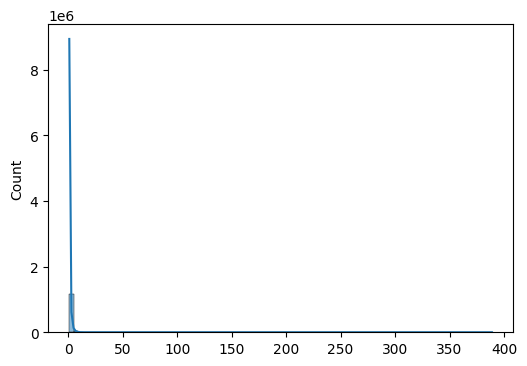

In [13]:
# Making the Histogram
user_rating = df.groupby('UserId')['Rating'].count()
user_rating = user_rating.values

plt.figure(figsize=(6,4))
sns.histplot(user_rating, kde=True, bins = 100)

Data is highly right Skewed

In [14]:
# Top, bottom 10 item based on rating
most_rated = df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)[:10]
least_rated = df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)[-10:]
most_rated, least_rated

(ProductId
 B001MA0QY2    7533
 B0009V1YR8    2869
 B0043OYFKU    2477
 B0000YUXI0    2143
 B003V265QW    2088
 B000ZMBSPE    2041
 B003BQ6QXK    1918
 B004OHQR1Q    1885
 B00121UVU0    1838
 B000FS05VG    1589
 Name: Rating, dtype: int64,
 ProductId
 B005O0LS6G    1
 B005O0BGLS    1
 1929099886    1
 1304651088    1
 130465110X    1
 1304651118    1
 1304651347    1
 1304665704    1
 130466578X    1
 1304622452    1
 Name: Rating, dtype: int64)

<Axes: ylabel='Count'>

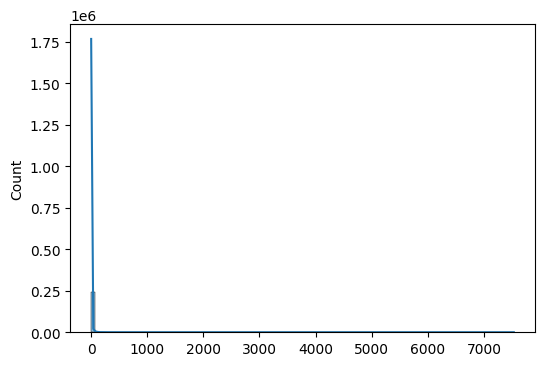

In [15]:
product_rating = df.groupby('ProductId')['Rating'].count()
product_rating = product_rating.values

plt.figure(figsize=(6,4))
sns.histplot(product_rating, kde=True, bins = 100)

This data is also highly right skewed

<Axes: ylabel='Count'>

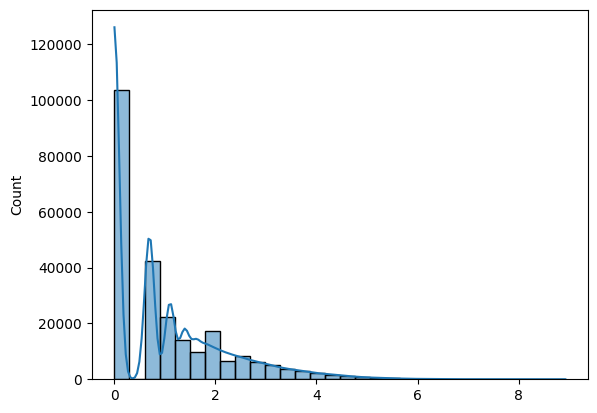

In [16]:
sns.histplot(np.log(product_rating), kde=True, bins = 30)

<Axes: >

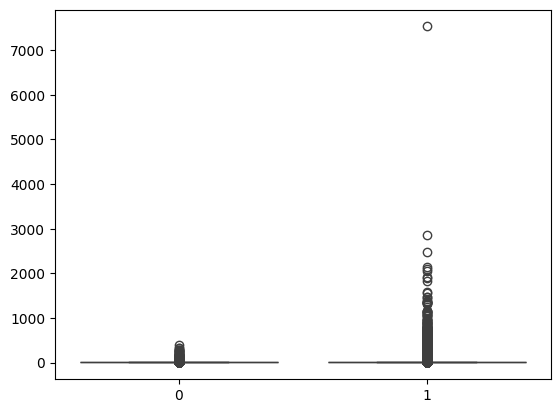

In [17]:
sns.boxplot([user_rating, product_rating])

In [18]:
df[df.ProductId=='B001MA0QY2']['Rating'].value_counts()

Rating
5    5107
4    1084
1     485
3     483
2     374
Name: count, dtype: int64

These Values are so sparsed

### PreProcessing

In [28]:
counts = df['UserId'].value_counts()
df_final = df[df['UserId'].isin(counts[counts >= 15].index)]

counts = df_final['ProductId'].value_counts()
df_final = df_final[df_final['ProductId'].isin(counts[counts >= 20].index)]

df_final.shape

(35284, 3)

In [29]:
df_final.head()

,UserId,ProductId,Rating
4247,A12LN1UTGCPU4R,B000052WYD,5
4249,A4DIVP0NEQDA3,B000052WYD,5
4260,A2JEGR5ASS6OE3,B000052WYD,3
4269,A3977OZLNA8LCB,B000052WYD,5
4270,A18Z7ICRLVHBBP,B000052WYD,5


<Axes: >

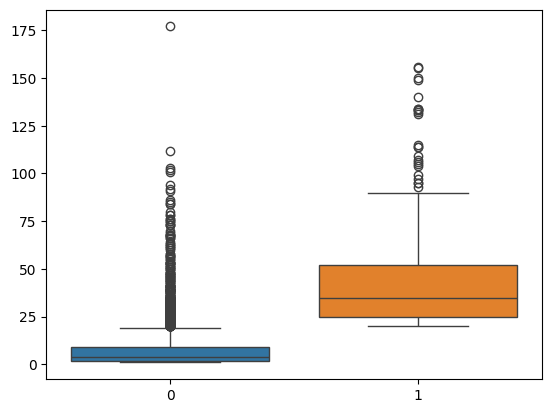

In [30]:
user_rating = df_final.groupby('UserId')['Rating'].count()
user_rating = user_rating.values

product_rating = df_final.groupby('ProductId')['Rating'].count()
product_rating = product_rating.values

sns.boxplot([user_rating, product_rating])

In [31]:
df_final.Rating.value_counts()

Rating
5    18000
4     9473
3     4611
2     2015
1     1185
Name: count, dtype: int64

In [32]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['UserId'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['ProductId'].nunique())

The number of observations in the final data = 35284
Number of unique USERS in the final data =  4456
Number of unique PRODUCTS in the final data =  850


We will be using the final_df for making models and would be used to predict the recomendations.

Checking the density of the rating matrix

In [33]:
matrix = df_final.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0).astype('int8')
matrix

ProductId,B000052WYD,B000052YJM,B000052YM4,B000052YM7,B000052YP6,B0000530ED,B0000536P4,B0000632EN,B00006FRW7,B00006JN4F,...,B00KAL5JAU,B00KCFAZTE,B00KCTER3U,B00KD73PBQ,B00KH6F6TM,B00KHGIK54,B00KHH2VOY,B00KQBR9FM,B00KQVTX06,B00KTLBEEQ
UserId,,,,,,,,,,,,,,,,,,,,,
A02155413BVL8D0G7X6DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03364251DGXSGA9PSR99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A099766128UI0NCS98N1E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100VQNP6I54HS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZOO27I3Z0IQO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZPHYNPEZDMIO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZTZ7SIIRXLXE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
matrix.size, matrix.shape, str(df.memory_usage().sum()/1024**2) + "MB"

(3787600, (4456, 850), '32.79907417297363MB')

In [35]:
#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = matrix.shape[0] * matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))


given_num_of_ratings =  35284
possible_num_of_ratings =  3787600
density: 0.93%


We have more than 4% of the values in  matrix

In [36]:
matrix.to_csv('../Data/Processed_matrix.csv')